In [67]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline

In [68]:
style.use('fivethirtyeight')

In [69]:
df = pd.read_csv("../data/derived/complete_dataset.csv")

In [51]:
#only streets in the city
street_names = df[df.data_source != "mclean"].geo_loc


In [52]:
#remove stop words
stopset = ("bloomington,illinois", "normal,illinois", "street", "st.", "road", "ave", "avenue",
          "n.","e.","w.","s.", "st","north","south","east","west")
street_names = street_names.str.lower().str.split()    
street_names = street_names.apply(lambda x: [item for item in x if item not in stopset])
street_names = street_names.str.join(" ")


In [53]:
#remove numbers
street_names = street_names.str.replace('\d+', '')

In [54]:
street_list = street_names.str.split(" and ")

In [55]:
crash_counts = pd.concat([street_list.str[0],street_list.str[1]]).value_counts()

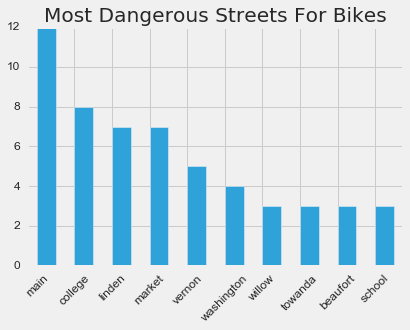

In [59]:
crash_counts[:10].plot(kind='bar', title="Most Dangerous Streets For Bikes", rot=45, fontsize=12, position=0, figsize=(6,4))

In [83]:
crash_counts.to_csv("../data/derived/crash_counts.csv")

In [17]:
style.available

['fivethirtyeight',
 'seaborn-whitegrid',
 'seaborn-poster',
 'seaborn-paper',
 'seaborn-notebook',
 'seaborn-deep',
 'seaborn-dark',
 'seaborn-muted',
 'seaborn-dark-palette',
 'grayscale',
 'seaborn-colorblind',
 'seaborn-bright',
 'seaborn-pastel',
 'bmh',
 'seaborn-darkgrid',
 'seaborn-white',
 'seaborn-talk',
 'seaborn-ticks',
 'ggplot',
 'dark_background',
 'classic']

In [70]:
df.crash_time.min()

'2014-03-26 17:18:00'

In [71]:
df[df.crash_time < '2014-01-01']

,id,fault,motorist_name,motorist_sex,insured,veh_make,veh_model,veh_year,cyclist_name,cyclist_sex,...,m_section,c_citation,c_section,hospital,cyclist_cat,summary,data_source,crash_time,lat,long


In [63]:
df.crash_time.max()

'2016-12-01 15:04:00'